#**Problem Statement**  
### **Business problem overview**  
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.   

For many incumbent operators, retaining high profitable customers is the number one business goal.   

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.   

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.   

#### **Understanding and defining churn**
There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services).  

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.   

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).    

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and Southeast Asia, while postpaid is more common in Europe in North America.  

This project is based on the Indian and Southeast Asian market.   

#### **Definitions of churn**  
There are various ways to define churn, such as:
**Revenue-based churn:** Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.   

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.   

**Usage-based churn:** Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.  

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.   

In this project, you will use the usage-based definition to define churn.   

#### **High-value churn**
In the Indian and the Southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.   

In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.   

##### **Understanding the business objective and the data**  
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively.  
The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.   

##### **Understanding customer behaviour during churn**  
Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :  
The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.  

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)  

The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.   

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.


# **Reading and Understanding the Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)

In [2]:
# Reading the data
churn = pd.read_csv("telecom_churn_data.csv")
churn.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,

In [3]:
# Lets check the dimensions of the dataset
churn.shape

(99999, 226)

In [4]:
#Verifying column datatypes
churn.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    mobile_number             99999 non-null  int64  
 1    circle_id                 99999 non-null  int64  
 2    loc_og_t2o_mou            98981 non-null  float64
 3    std_og_t2o_mou            98981 non-null  float64
 4    loc_ic_t2o_mou            98981 non-null  float64
 5    last_date_of_month_6      99999 non-null  object 
 6    last_date_of_month_7      99398 non-null  object 
 7    last_date_of_month_8      98899 non-null  object 
 8    last_date_of_month_9      98340 non-null  object 
 9    arpu_6                    99999 non-null  float64
 10   arpu_7                    99999 non-null  float64
 11   arpu_8                    99999 non-null  float64
 12   arpu_9                    99999 non-null  float64
 13   onnet_mou_6               96062 non-null  fl

In [5]:
# check stastical summary of the dataset
churn.describe().T

,count,mean,std,min,25%,50%,75%,max
mobile_number,99999.0,7.001207e+09,695669.386290,7.000000e+09,7.000606e+09,7.001205e+09,7.001812e+09,7.002411e+09
circle_id,99999.0,1.090000e+02,0.000000,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
loc_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
std_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
loc_ic_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
arpu_6,99999.0,2.829874e+02,328.439770,-2.258709e+03,9.341150e+01,1.977040e+02,3.710600e+02,2.773109e+04
arpu_7,99999.0,2.785366e+02,338.156291,-2.014045e+03,8.698050e+01,1.916400e+02,3.653445e+02,3.514583e+04
arpu_8,99999.0,2.791547e+02,344.474791,-9.458080e+02,8.412600e+01,1.920800e+02,3.693705e+02,3.354362e+04
arpu_9,99999.0,2.616451e+02,341.998630,-1.899505e+03,6.268500e+01,1.768490e+02,3.534665e+02,3.880562e+04
onnet_mou_6,96062.0,1.323959e+02,297.207406,0.000000e+00,7.380000e+00,3.431000e+01,1.187400e+02,7.376710e+03


In [6]:
# names of the columns
col_list = churn.columns.to_list()
col_list

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

In [7]:
# Change the names of the columns
churn = churn.rename(columns={'aug_vbc_3g': 'vbc_3g_8', 'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'sep_vbc_3g': 'vbc_3g_9'})

#### Change Datatypes of the date columns to datetime.

In [8]:
# Last date columns list
last_date_cols = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
                  'last_date_of_month_9']

# List of recharge columns
last_recharge_cols = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
                      'date_of_last_rech_9']

# Lis of last rechange data columns
date_of_last_recharge = ['date_of_last_rech_data_6','date_of_last_rech_data_7',
                         'date_of_last_rech_data_8','date_of_last_rech_data_9']

In [9]:
# Change datatype for last_date_cols
for i in last_date_cols:
  churn[i] = pd.to_datetime(churn[i],format='%m/%d/%Y')

# Change datatype for last_recharge_cols
for i in last_recharge_cols:
  churn[i] = pd.to_datetime(churn[i],format='%m/%d/%Y')

# Change datatype for date_of_last_recharge
for i in date_of_last_recharge:
  churn[i] = pd.to_datetime(churn[i],format='%m/%d/%Y')

In [10]:
# Lets check the datatype of the datset
churn.dtypes

mobile_number                        int64
circle_id                            int64
loc_og_t2o_mou                     float64
std_og_t2o_mou                     float64
loc_ic_t2o_mou                     float64
last_date_of_month_6        datetime64[ns]
last_date_of_month_7        datetime64[ns]
last_date_of_month_8        datetime64[ns]
last_date_of_month_9        datetime64[ns]
arpu_6                             float64
arpu_7                             float64
arpu_8                             float64
arpu_9                             float64
onnet_mou_6                        float64
onnet_mou_7                        float64
onnet_mou_8                        float64
onnet_mou_9                        float64
offnet_mou_6                       float64
offnet_mou_7                       float64
offnet_mou_8                       float64
offnet_mou_9                       float64
roam_ic_mou_6                      float64
roam_ic_mou_7                      float64
roam_ic_mou

#### Checking missng values and missing value treatment

In [11]:
# Lets check the missing values in the dataset
churn.isnull().sum().sort_values(ascending=False)

arpu_3g_6                   74846
night_pck_user_6            74846
total_rech_data_6           74846
arpu_2g_6                   74846
max_rech_data_6             74846
fb_user_6                   74846
av_rech_amt_data_6          74846
date_of_last_rech_data_6    74846
count_rech_2g_6             74846
count_rech_3g_6             74846
date_of_last_rech_data_7    74428
total_rech_data_7           74428
fb_user_7                   74428
max_rech_data_7             74428
night_pck_user_7            74428
count_rech_2g_7             74428
av_rech_amt_data_7          74428
arpu_2g_7                   74428
count_rech_3g_7             74428
arpu_3g_7                   74428
total_rech_data_9           74077
count_rech_3g_9             74077
fb_user_9                   74077
max_rech_data_9             74077
arpu_3g_9                   74077
date_of_last_rech_data_9    74077
night_pck_user_9            74077
arpu_2g_9                   74077
count_rech_2g_9             74077
av_rech_amt_da

In [12]:
# Lets check the % of missing values
(100*churn.isnull().sum()/churn.shape[0]).sort_values(ascending=False)

arpu_3g_6                   74.846748
night_pck_user_6            74.846748
total_rech_data_6           74.846748
arpu_2g_6                   74.846748
max_rech_data_6             74.846748
fb_user_6                   74.846748
av_rech_amt_data_6          74.846748
date_of_last_rech_data_6    74.846748
count_rech_2g_6             74.846748
count_rech_3g_6             74.846748
date_of_last_rech_data_7    74.428744
total_rech_data_7           74.428744
fb_user_7                   74.428744
max_rech_data_7             74.428744
night_pck_user_7            74.428744
count_rech_2g_7             74.428744
av_rech_amt_data_7          74.428744
arpu_2g_7                   74.428744
count_rech_3g_7             74.428744
arpu_3g_7                   74.428744
total_rech_data_9           74.077741
count_rech_3g_9             74.077741
fb_user_9                   74.077741
max_rech_data_9             74.077741
arpu_3g_9                   74.077741
date_of_last_rech_data_9    74.077741
night_pck_us

### Handling Missing Values

- **Here we can see that lots of columns have missing values and % of missing is also higher.Lets first check the wether the missings are at random or not. If not we will impute with proper consideration going forward.**

- **Lets see month wise dataframe to check if pattern is visible in missing values**

In [13]:
# Missing pattern for month number 6
churn[['total_rech_data_6','av_rech_amt_data_6','max_rech_data_6','count_rech_2g_6',
       'count_rech_3g_6','night_pck_user_6','arpu_3g_6','arpu_2g_6','fb_user_6',
       'date_of_last_rech_data_6']].isnull().sum()

total_rech_data_6           74846
av_rech_amt_data_6          74846
max_rech_data_6             74846
count_rech_2g_6             74846
count_rech_3g_6             74846
night_pck_user_6            74846
arpu_3g_6                   74846
arpu_2g_6                   74846
fb_user_6                   74846
date_of_last_rech_data_6    74846
dtype: int64

In [14]:
# Missing pattern for month number 7
churn[['total_rech_data_7','av_rech_amt_data_7','max_rech_data_7','count_rech_2g_7',
       'count_rech_3g_7','night_pck_user_7','arpu_3g_7','arpu_2g_7','fb_user_7',
       'date_of_last_rech_data_7']].isnull().sum()

total_rech_data_7           74428
av_rech_amt_data_7          74428
max_rech_data_7             74428
count_rech_2g_7             74428
count_rech_3g_7             74428
night_pck_user_7            74428
arpu_3g_7                   74428
arpu_2g_7                   74428
fb_user_7                   74428
date_of_last_rech_data_7    74428
dtype: int64

In [15]:
# Missing pattern for month number 8
churn[['total_rech_data_8','av_rech_amt_data_8','max_rech_data_8','count_rech_2g_8',
       'count_rech_3g_8','night_pck_user_8','arpu_3g_8','arpu_2g_8','fb_user_8',
       'date_of_last_rech_data_8']].isnull().sum()

total_rech_data_8           73660
av_rech_amt_data_8          73660
max_rech_data_8             73660
count_rech_2g_8             73660
count_rech_3g_8             73660
night_pck_user_8            73660
arpu_3g_8                   73660
arpu_2g_8                   73660
fb_user_8                   73660
date_of_last_rech_data_8    73660
dtype: int64

In [16]:
# Missing pattern for month number 9
churn[['total_rech_data_9','av_rech_amt_data_9','max_rech_data_9','count_rech_2g_9',
       'count_rech_3g_9','night_pck_user_9','arpu_3g_9','arpu_2g_9','fb_user_9',
       'date_of_last_rech_data_9']].isnull().sum()

total_rech_data_9           74077
av_rech_amt_data_9          74077
max_rech_data_9             74077
count_rech_2g_9             74077
count_rech_3g_9             74077
night_pck_user_9            74077
arpu_3g_9                   74077
arpu_2g_9                   74077
fb_user_9                   74077
date_of_last_rech_data_9    74077
dtype: int64

- **We can observe here that the missing values are not missing at rondom, so we will impute this missing values with zero(0) considering that the customer has not made any recharge for that month**

In [17]:
# Lets create list of all the recharge related field 
RechargeRelatedcols = ['total_rech_data_6','av_rech_amt_data_6','max_rech_data_6','count_rech_2g_6',
                         'count_rech_3g_6','night_pck_user_6','arpu_3g_6','arpu_2g_6','fb_user_6','total_rech_data_7',
                         'av_rech_amt_data_7',
                         'max_rech_data_7','count_rech_2g_7','count_rech_3g_7','night_pck_user_7',
                         'arpu_3g_7','arpu_2g_7','fb_user_7',
                         'total_rech_data_8','av_rech_amt_data_8','max_rech_data_8','count_rech_2g_8',
                         'count_rech_3g_8','night_pck_user_8','arpu_3g_8','arpu_2g_8','fb_user_8',
                         'total_rech_data_9','av_rech_amt_data_9',
                         'max_rech_data_9','count_rech_2g_9','count_rech_3g_9','night_pck_user_9',
                         'arpu_3g_9','arpu_2g_9','fb_user_9']

# Fill missing values to  '0' as customer has not recharged or used any services
churn[RechargeRelatedcols] = churn[RechargeRelatedcols].fillna(0)

- We see that '_mou' related columns per month are split across various type of calls like t2t, t2m, etc and there is a corresponding 'total_mou' column. So, for a given customer, if the 'total_mou' in a given month is zero, then we can safely impute the sub-category calls in that month for that customer to 0.

In [18]:
#churn[churn.ic_others_8.isnull()][:50]

In [19]:
def handle_mou(df, category):
    for month in ['6','7','8','9']:
        mou_cols = [col for col in df.columns if ((col[-5:] == 'mou_' + month) & (category in col))]
        mou_cols.append('onnet_mou_' + month)
        mou_cols.append('offnet_mou_' + month)
        mou_cols.append(category + '_others_' + month)
        total_col = 'total_' + category + '_mou_' + month
        df.update(df[df[total_col] == 0][mou_cols].fillna(0))


In [20]:
# for month in ['6','7','8','9']:
#         mou_cols = [col for col in df.columns if ((col[-5:] == 'mou_' + month) & (category in col))]
#         mou_cols.append('onnet_mou_' + month)
#         mou_cols.append('offnet_mou_' + month)
#         mou_cols.append('ic_others' + month)

In [21]:
# Filling missing values in "og",'ic' by using handle_mou function
handle_mou(churn, 'og')
handle_mou(churn, 'ic')

In [22]:
# Lets check missing values
churn.isnull().sum().sort_values(ascending=False)

date_of_last_rech_data_6    74846
date_of_last_rech_data_7    74428
date_of_last_rech_data_9    74077
date_of_last_rech_data_8    73660
date_of_last_rech_9          4760
date_of_last_rech_8          3622
date_of_last_rech_7          1767
last_date_of_month_9         1659
date_of_last_rech_6          1607
last_date_of_month_8         1100
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_7          601
last_day_rch_amt_7              0
mobile_number                   0
last_day_rch_amt_6              0
last_day_rch_amt_8              0
max_rech_amt_8                  0
max_rech_amt_7                  0
max_rech_amt_9                  0
total_rech_data_6               0
last_day_rch_amt_9              0
total_rech_amt_9                0
total_rech_data_7               0
total_rech_data_8               0
total_rech_data_9               0
max_rech_data_6                 0
max_rech_data_7                 0
max_rech_data_

-  Lets find the pattern in loc_og_t2o_mou','loc_ic_t2o_mou','std_og_t2o_mou there are 1018 observations where the above columns are NaNs. Check how many of them have 'total' mou as 0.

In [23]:
#Check the number of observations where:
# a) any loc_og_t2o_mou, loc_ic_t2o_mou and std_og_t2o_mou is NaN  AND
# b) Sum of total mou fo all types and months for that observation is zero.
churn[((churn[['loc_og_t2o_mou','loc_ic_t2o_mou','std_og_t2o_mou']].isnull().any(axis = 1)) 
       & (churn['total_ic_mou_6']==0) & (churn['total_ic_mou_7']==0) & (churn['total_ic_mou_8']==0) 
       & (churn['total_ic_mou_9']==0) & (churn['total_og_mou_6']==0) & (churn['total_og_mou_7']==0) 
       & (churn['total_og_mou_8']==0) & (churn['total_og_mou_9']==0))]

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9
201,7000669827,109,NaN,NaN,NaN,2014-06-30,2014-07-31,2014-08-31,2014-09-30,45.000,46.500,46.500,45.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,2,0,0,0,0,0,0,0,0,0,2014-06-21,NaT,

In [24]:
# For loc_og_t2o_mou','loc_ic_t2o_mou','std_og_t2o_mou,  1018 rows are missing so we can fill in 
# missing values with 0.

churn.update(churn[['loc_og_t2o_mou','loc_ic_t2o_mou','std_og_t2o_mou']].fillna(0))

In [25]:
# Lets check missing values
churn.isnull().sum().sort_values(ascending=False)

date_of_last_rech_data_6    74846
date_of_last_rech_data_7    74428
date_of_last_rech_data_9    74077
date_of_last_rech_data_8    73660
date_of_last_rech_9          4760
date_of_last_rech_8          3622
date_of_last_rech_7          1767
last_date_of_month_9         1659
date_of_last_rech_6          1607
last_date_of_month_8         1100
last_date_of_month_7          601
last_day_rch_amt_8              0
max_rech_amt_9                  0
max_rech_amt_8                  0
max_rech_amt_7                  0
last_day_rch_amt_6              0
max_rech_amt_6                  0
last_day_rch_amt_7              0
mobile_number                   0
last_day_rch_amt_9              0
total_rech_amt_8                0
total_rech_data_6               0
total_rech_data_7               0
total_rech_data_8               0
total_rech_data_9               0
max_rech_data_6                 0
max_rech_data_7                 0
max_rech_data_8                 0
max_rech_data_9                 0
total_rech_amt

### Calculating the churn and non-churn values

In [26]:
# Calculating average recharge for 6th and 7th month
# This will have 2 components => Data realted recharge and non data related recharges

# total_rech_6 for month 6
churn['total_rech_6'] = (churn['av_rech_amt_data_6']*churn['total_rech_data_6']) + churn['total_rech_amt_6']

# total_rech_6 for month 7
churn['total_rech_7'] = (churn['av_rech_amt_data_7']*churn['total_rech_data_7']) + churn['total_rech_amt_7']

# total_rech_6 for month 8
churn['total_rech_8'] = (churn['av_rech_amt_data_8']*churn['total_rech_data_8']) + churn['total_rech_amt_8']

# average recharge amount for the month 6 and 7
churn['avg_rech_amt_6_7'] = (churn['total_rech_6'] + churn['total_rech_7'])/2

#### Filter high-value customers:
**AS per the problem statement, we have to select high value customer based on 70 percentile of average amount of the month 6 and 7.**

In [27]:
# finding 70th percentile of average recharge.
perct_70 = churn['avg_rech_amt_6_7'].quantile(0.7)
perct_70

478.0

In [28]:
#High Value Customer.
churn = churn[churn['avg_rech_amt_6_7'] >= perct_70]
churn.shape

(30001, 230)

##### Tag churners and remove attributes of the churn phase
Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [29]:
#Deciding Churn category based on usage 
churn['target_churn'] = np.where((churn['total_ic_mou_9']==0) & (churn['total_og_mou_9']==0) 
                       & (churn['vol_2g_mb_9']==0) & (churn['vol_3g_mb_9']==0), 1, 0)

In [30]:
# Lets check the value counts for target variable
churn['target_churn'].value_counts(normalize=True)

0    0.918636
1    0.081364
Name: target_churn, dtype: float64

In [31]:
#removing all columns with month _9 data
cols = [c for c in churn.columns if c[-2:] != '_9']
churn = churn[cols]
churn.shape

(30001, 176)

In [32]:
#Checking null values
(100*churn.isnull().sum()/churn.shape[0]).sort_values(ascending=False)

date_of_last_rech_data_8    46.825106
date_of_last_rech_data_6    44.148528
date_of_last_rech_data_7    43.145228
date_of_last_rech_8          1.943269
last_date_of_month_8         0.549982
date_of_last_rech_7          0.326656
date_of_last_rech_6          0.243325
last_date_of_month_7         0.089997
mobile_number                0.000000
last_day_rch_amt_6           0.000000
last_day_rch_amt_7           0.000000
last_day_rch_amt_8           0.000000
total_rech_data_7            0.000000
total_rech_data_6            0.000000
max_rech_amt_7               0.000000
total_rech_data_8            0.000000
max_rech_data_6              0.000000
max_rech_data_7              0.000000
max_rech_data_8              0.000000
count_rech_2g_6              0.000000
count_rech_2g_7              0.000000
count_rech_2g_8              0.000000
max_rech_amt_8               0.000000
total_rech_amt_8             0.000000
max_rech_amt_6               0.000000
isd_ic_mou_7                 0.000000
std_ic_mou_8

**Here we see that there are few date related columns that are having few null values. We will create a column to capture number of days between 01/06/2014. If we still have null values then we will consider those datapoints as the one which is not recharged for a long time and replace them with 93 days.**

In [33]:
# Methods to calculate number of days
from datetime import datetime
import math
def no_of_days(d):
    start_date = datetime(2014,6,1)
    days_number = (d-start_date).days
    return 93.0 if math.isnan(days_number) else days_number

In [34]:
churn['no_of_days_since_last_rech_6'] = churn['date_of_last_rech_6'].apply(lambda d: no_of_days(d))
churn['no_of_days_since_last_rech_7'] = churn['date_of_last_rech_7'].apply(lambda d: no_of_days(d))
churn['no_of_days_since_last_rech_8'] = churn['date_of_last_rech_8'].apply(lambda d: no_of_days(d))
churn['no_of_days_since_last_data_rech_8'] = churn['date_of_last_rech_data_8'].apply(lambda d: no_of_days(d))
churn['no_of_days_since_last_data_rech_6'] = churn['date_of_last_rech_data_6'].apply(lambda d: no_of_days(d))
churn['no_of_days_since_last_data_rech_7'] = churn['date_of_last_rech_data_7'].apply(lambda d: no_of_days(d))

In [35]:
# Dropping the date columns and also mobile number and circle id now
#We will also drop the last_date_of_month_8,last_date_of_month_6,and last_date_of_month_7 as these are always supposed to have one value
churn.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
            'date_of_last_rech_data_8','date_of_last_rech_data_6','date_of_last_rech_data_7',
           'mobile_number','circle_id','last_date_of_month_8','last_date_of_month_7',
            'last_date_of_month_6'], axis=1, inplace=True)

In [36]:
(100*churn.isnull().sum()/churn.shape[0]).sort_values(ascending=False)

loc_og_t2o_mou                       0.0
count_rech_2g_6                      0.0
last_day_rch_amt_7                   0.0
last_day_rch_amt_8                   0.0
total_rech_data_6                    0.0
total_rech_data_7                    0.0
total_rech_data_8                    0.0
max_rech_data_6                      0.0
max_rech_data_7                      0.0
max_rech_data_8                      0.0
count_rech_2g_7                      0.0
vol_2g_mb_8                          0.0
count_rech_2g_8                      0.0
count_rech_3g_6                      0.0
count_rech_3g_7                      0.0
count_rech_3g_8                      0.0
av_rech_amt_data_6                   0.0
av_rech_amt_data_7                   0.0
av_rech_amt_data_8                   0.0
vol_2g_mb_6                          0.0
last_day_rch_amt_6                   0.0
max_rech_amt_8                       0.0
max_rech_amt_7                       0.0
max_rech_amt_6                       0.0
total_ic_mou_7  

In [37]:
# Dataset dimensions after filling missing values.
churn.shape

(30001, 171)

In [38]:
#Checking for columns which have only one column and dropping them
cols_with_one_category = churn.columns[churn.nunique()==1].to_list()
len(cols_with_one_category)

9

In [39]:
churn.drop(cols_with_one_category,inplace=True,axis=1)
len(churn.columns)

162

#### Outliers Treatment

In [40]:
# Here we can see all the missing values are imputed. So going ahead with outlier treatment
#We will drop those rows where for more than 20 columns the values are 3 times more then IQR
Q1 = churn.quantile(0.25)
Q3 = churn.quantile(0.75)
IQR = Q3 - Q1
churn = churn[~(((churn < (Q1 - (1.5 * IQR))) |(churn > (Q3 + (1.5 * IQR)))).sum(axis=1) > 20)]
churn.shape

(20350, 162)

In [41]:
#Data for month 6 and 7 can be grouped as good phase data and data for month 8 can be considered as action phase data

# For each of the numeric columns, create a new '_avg_good_phase' columns which is simply
# the average of values in _6 and _7 columns for each type of metric for each observation
def average_cols(data, numeric_cols):
    for c in numeric_cols:
        col_6 = c + '_6'
        col_7 = c + '_7'
        avg_col = c + '_avg_good_phase'
        # Calculate average of month 6 and 7.
        data[avg_col] = (data[col_6] + data[col_7]) / 2  
        #print(avg_col)
        data.drop([col_6, col_7], axis = 1, inplace = True)


In [42]:
#List of all numeric columns
numeric_cols = [c.split('_6')[0] for c in churn.columns if ((c[-2:] == '_6') 
                                                            & ~('no_of_days_since_last_rech' in c)
                                                            & ~('no_of_days_since_last_data_rech' in c)
                                                            & ~('fb' in c) 
                                                            & ~('night' in c))]

In [43]:
average_cols(churn, numeric_cols)

In [44]:
churn.nunique().sort_values(ascending=True)

fb_user_6                                2
fb_user_8                                2
fb_user_7                                2
night_pck_user_6                         2
night_pck_user_7                         2
target_churn                             2
night_pck_user_8                         2
monthly_3g_8                             5
monthly_2g_8                             6
monthly_2g_avg_good_phase                8
monthly_3g_avg_good_phase                8
sachet_3g_8                             14
count_rech_3g_8                         14
count_rech_3g_avg_good_phase            15
sachet_3g_avg_good_phase                16
sachet_2g_8                             24
count_rech_2g_8                         24
total_rech_data_8                       28
no_of_days_since_last_rech_6            31
no_of_days_since_last_data_rech_6       31
no_of_days_since_last_data_rech_7       32
no_of_days_since_last_data_rech_8       32
no_of_days_since_last_rech_8            32
no_of_days_

In [45]:
#There are columns which have 2 values. They are treated as categorical columns
cat_cols = churn.columns[churn.nunique()==2].to_list()

In [46]:
target_col = 'target_churn'
cat_cols.remove('target_churn')
cat_cols

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

In [47]:
num_cols = [ col for col in churn.columns if col not in cat_cols]
num_cols.remove('target_churn')
num_cols

['arpu_8',
 'onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'og_others_8',
 'total_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'count_rech_2g_8',
 'count_rech_3g_8',
 'av_rech_amt_data_8',
 'vol_2g_mb_8',
 'vol_3g_mb_8',
 'arpu_3g_8',
 'arpu_2g_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_8',
 'sachet_3g_8',
 'aon',
 'vbc_3g_8',
 'total_rech_8',
 'avg_rech_amt_6_7',
 'no_of_days_since_last_rech_6',
 'no_of_days_since_last_rech_7',
 

## Exploratory Data Analysis

In [48]:
sns.set_style("darkgrid")

0    90.314496
1     9.685504
Name: target_churn, dtype: float64


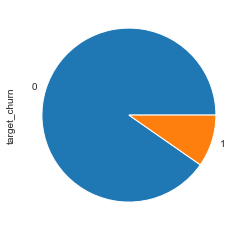

In [49]:
#Checking distribution of churn and non churn data
print((churn['target_churn'].value_counts()/len(churn))*100)
((churn['target_churn'].value_counts()/len(churn))*100).plot(kind="pie")
plt.show()

There is high class imbalance. So when we will building the model we need to apply some class balancing techniques

In [50]:
#Dividing data into churn and non churn 
data_churn = churn[churn['target_churn'] == 1]
data_nochurn = churn[churn['target_churn'] == 0]

In [51]:
data_churn.total_og_mou_8.describe()

count    1971.000000
mean      143.983836
std       336.380123
min         0.000000
25%         0.000000
50%         0.000000
75%       110.205000
max      4259.010000
Name: total_og_mou_8, dtype: float64

In [52]:
data_nochurn.total_og_mou_8.describe()

count    18379.000000
mean       480.798545
std        554.572996
min          0.000000
25%         73.060000
50%        311.610000
75%        707.660000
max      14043.060000
Name: total_og_mou_8, dtype: float64

Looking at the above report and median, we can say that the customers who churned have used the network less in the action phase as compared to non churn customers.

In [53]:
def plotDistPlots(cols):
    for col in cols:
        #print(col)
        plt.figure(figsize=(16, 4))
        plt.subplot(1, 2, 1)
        sns.distplot(data_churn[col])
        #plt.axvline(data_churn[col].mean(), c="black")
        #plt.axvline(data_churn[col].median(), c="red")
        plt.title("CHURN",color='red', fontsize=15)
        
        plt.subplot(1, 2, 2)
        sns.distplot(data_nochurn[col])
        #plt.axvline(data_nochurn[col].mean(), c="black")
        #plt.axvline(data_nochurn[col].median(), c="red")
        plt.title("NO CHURN",color='red', fontsize=12)

In [54]:
# #Distribution of the churned and non churned 
# for col in num_cols:
#     #plt.subplot(100,2,a)
#     fig = plt.figure(figsize=[8,5], dpi=100)
#     sns.distplot(data_churn[col],label='Churned')
#     sns.distplot(data_nochurn[col],label='Not_churned')
#     plt.title('Distribution of {} for Churned and  Not_Churned'.format(col),color='red', fontsize=15)
    
#     plt.legend()
#     fig.tight_layout()
#     plt.show() 

In [55]:
#plotDistPlots(num_cols)

In [56]:
def churn_vs_nonchurn(var_l):
    for var in var_l:
        suffix_str_l = ['_avg_good_phase','_8']
        var_suffix_l = [var + x for x in suffix_str_l]
        plt.figure(figsize=(16, 4), dpi=100)
        plt.subplot(1, 2, 1)
        sns.barplot(data=data_churn[var_suffix_l])
        plt.title("CHURN",color='red', fontsize=15)

        plt.subplot(1, 2, 2)
        sns.barplot(data=data_nochurn[var_suffix_l])
        plt.title("NO CHURN",color='red', fontsize=15)
        

In [57]:
print(numeric_cols)

['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou', 'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou', 'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou', 'std_og_mou', 'isd_og_mou', 'spl_og_mou', 'og_others', 'total_og_mou', 'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou', 'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_mou', 'total_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others', 'total_rech_num', 'total_rech_amt', 'max_rech_amt', 'last_day_rch_amt', 'total_rech_data', 'max_rech_data', 'count_rech_2g', 'count_rech_3g', 'av_rech_amt_data', 'vol_2g_mb', 'vol_3g_mb', 'arpu_3g', 'arpu_2g', 'monthly_2g', 'sachet_2g', 'monthly_3g', 'sachet_3g', 'vbc_3g', 'total_rech']


In [58]:
colsToCompare = numeric_cols.copy()

In [59]:
# churn_vs_nonchurn(colsToCompare)

If we look at the churn data , we can see a pattern that for most of the metrics like outgoing mou, incoming mou, recharge amount, etc has shown decline from good phase to action phase. 

If we compare between that action phase of churn and non churn we can see that metrics like arpu, onnet_mou , offnet mou etc has declined. Here roaming related data follows a reverse trend i.e for action phase of churn vs non churn the roaming related data has increased which suggests that customers who are in roaming are more likely to churn.

However, the usage among non-churned customers remain fairly consistent across the two phases.

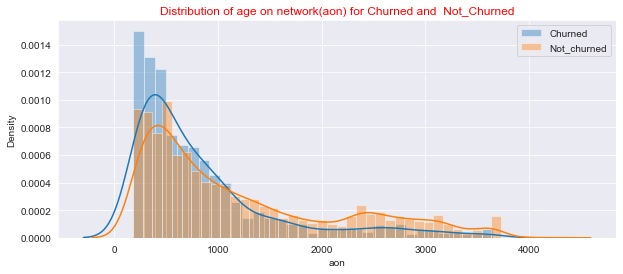

In [60]:
# Distribution of the churned and non-churn 
plt.figure(figsize=(10, 4))
aon_churned = churn[churn['target_churn']== 1]['aon']
aon_not_churned = churn[churn['target_churn'] ==0]['aon']
sns.distplot(aon_churned,label='Churned')
sns.distplot(aon_not_churned,label='Not_churned')
plt.title('Distribution of age on network(aon) for Churned and  Not_Churned',color='r',fontsize=12)
plt.legend()
plt.show()

#### Multivariate Analysis

In [61]:
# # Lets check the relationship among the variables by heatmap
# plt.figure(figsize=(80,80), dpi=200)
# sns.heatmap(data_churn.corr(), annot=True, cmap='coolwarm')
# plt.title("CHURN",color='red', fontsize=15)
# plt.show()

In [62]:
# # Lets check the relationship among the variables by heatmap
# plt.figure(figsize=(80,80), dpi=200)
# sns.heatmap(data_nochurn.corr(), annot=True, cmap='coolwarm',fmt=".1f")
# plt.title("Non CHURN",color='red', fontsize=15)
# plt.show()

In [63]:
churn.columns.to_list()

['arpu_8',
 'onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'og_others_8',
 'total_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'count_rech_2g_8',
 'count_rech_3g_8',
 'av_rech_amt_data_8',
 'vol_2g_mb_8',
 'vol_3g_mb_8',
 'arpu_3g_8',
 'arpu_2g_8',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_8',
 'sachet_3g_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'aon',
 'vbc_3g_8',


1. night_pck_user_6,night_pck_user_7
2. fb_user_6', fb_user_7
3. aon
4. no_of_days_since_last_rech_6', 'no_of_days_since_last_rech_7'
5. 'no_of_days_since_last_data_rech_6', 'no_of_days_since_last_data_rech_7',

These columns should also be included in good phase.

In [64]:
#Verifying column datatypes
churn.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20350 entries, 0 to 99988
Data columns (total 113 columns):
 #    Column                             Non-Null Count  Dtype  
---   ------                             --------------  -----  
 0    arpu_8                             20350 non-null  float64
 1    onnet_mou_8                        20350 non-null  float64
 2    offnet_mou_8                       20350 non-null  float64
 3    roam_ic_mou_8                      20350 non-null  float64
 4    roam_og_mou_8                      20350 non-null  float64
 5    loc_og_t2t_mou_8                   20350 non-null  float64
 6    loc_og_t2m_mou_8                   20350 non-null  float64
 7    loc_og_t2f_mou_8                   20350 non-null  float64
 8    loc_og_t2c_mou_8                   20350 non-null  float64
 9    loc_og_mou_8                       20350 non-null  float64
 10   std_og_t2t_mou_8                   20350 non-null  float64
 11   std_og_t2m_mou_8                   2035

## Model Building

### Principle Component Analysis(PCA)

In [65]:
#Load required library
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn import metrics



In [66]:
#Peform the train test split 
df_train,df_test = train_test_split(churn,test_size=0.3,random_state=101)

In [67]:
# check the training and testing data shape
print("df_train shape: {}".format(df_train.shape))
print("df_test shape: {}".format(df_test.shape))

df_train shape: (14245, 113)
df_test shape: (6105, 113)


In [68]:
# segregate  X_train and y_train 
y_train = df_train.pop("target_churn")
X_train = df_train

# Segregate X_test and y_test
y_test = df_test.pop("target_churn")
X_test = df_test

- As we have checked the imbalance in data. So would take care of data imbalance here.

#### Feature Scaling
We need to perform the scaling to feed the scaled data to PCA.  
We would be using minmax scaling

In [69]:
from sklearn.preprocessing import MinMaxScaler
# Instatiate the MinMaxScaler scaler
scaler = MinMaxScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,total_rech_8,avg_rech_amt_6_7,no_of_days_since_last_rech_6,no_of_days_since_last_rech_7,no_of_days_since_last_rech_8,no_of_days_since_last_data_rech_8,no_of_days_since_last_data_rech_6,no_of_days_since_last_data_rech_7,arpu_avg_good_phase,onnet_mou_avg_good_phase,offnet_mou_avg_good_phase,roam_ic_mou_avg_good_phase,roam_og_mou_avg_good_phase,loc_og_t2t_mou_avg_good_phase,loc_og_t2m_mou_avg_good_phase,loc_og_t2f_mou_avg_good_phase,loc_og_t2c_mou_avg_good_phase,loc_og_mou_avg_good_phase,std_og_t2t_mou_avg_good_phase,std_og_t2m_mou_avg_good_phase,std_og_t2f_mou_avg_good_phase,std_og_mou_avg_good_phase,isd_og_mou_avg_good_phase,spl_og_mou_avg_good_phase,og_others_avg_good_phase,total_og_mou_avg_good_phase,loc_ic_t2t_mou_avg_good_phase,loc_ic_t2m_mou_avg_good_phase,loc_ic_t2f_mou_avg_good_phase,loc_ic_mou_avg_good_phase,std_ic_t2t_mou_avg_good_phase,std_ic_t2m_mou_avg_good_phase,std_ic_t2f_mou_avg_good_phase,std_ic_mou_avg_good_phase,total_ic_mou_avg_good_phase,spl_ic_mou_avg_good_phase,isd_ic_mou_avg_good_phase,ic_others_avg_good_phase,total_rech_num_avg_good_phase,total_rech_amt_avg_good_phase,max_rech_amt_avg_good_phase,last_day_rch_amt_avg_good_phase,total_rech_data_avg_good_phase,max_rech_data_avg_good_phase,count_rech_2g_avg_good_phase,count_rech_3g_avg_good_phase,av_rech_amt_data_avg_good_phase,vol_2g_mb_avg_good_phase,vol_3g_mb_avg_good_phase,arpu_3g_avg_good_phase,arpu_2g_avg_good_phase,monthly_2g_avg_good_phase,sachet_2g_avg_good_phase,monthly_3g_avg_good_phase,sachet_3g_avg_good_phase,vbc_3g_avg_good_phase,total_rech_avg_good_phase
68337,0.024773,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.009804,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.0,0.000000,0.000000,0.00000,0.019854,0.014390,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,1.0,1.0,0.0,0.223052,0.000000,0.000000,0.164350,0.301075,0.333333,0.15625,1.00000,0.129032,0.333333,0.049685,0.011918,0.070256,0.000000,0.000000,0.008534,0.102624,0.004466,0.003469,0.071551,0.004528,0.000000,0.0,0.003433,0.0,0.027151,0.000000,0.076094,0.022603,0.048015,0.015952,0.065984,0.009981,0.000000,0.002751,0.004042,0.068354,0.022255,0.000000,0.000000,0.125806,0.027600,0.012667,0.022687,0.333333,0.038381,0.285714,0.142857,0.251840,0.094738,0.015922,0.058429,0.098525,0.000000,0.285714,0.0,0.142857,0.000000,0.164350
82546,0.024971,0.000000,0.000000,0.000348,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.029412,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.0,0.000000,0.000000,0.00000,0.019854,0.014390,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.185213,0.000000,0.000000,0.001204,0.279570,0.476190,0.78125,1.00000,1.000000,1.000000,0.045749,0.004265,0.217616,0.000000,0.000000,0.001014,0.008967,0.009842,0.000000,0.007654,0.004348,0.210364,0.0,0.212721,0.0,0.007936,0.000000,0.205029,0.005284,0.011905,0.000000,0.014964,0.000577,0.026534,0.000000,0.026711,0.047278,0.000000,0.0

In [70]:
# summary of train dataframe
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
arpu_8,14245.0,0.053120,0.022482,0.0,0.037925,0.050775,0.064282,1.0
onnet_mou_8,14245.0,0.039913,0.075593,0.0,0.001252,0.010313,0.039532,1.0
offnet_mou_8,14245.0,0.019098,0.027564,0.0,0.002123,0.010094,0.025841,1.0
roam_ic_mou_8,14245.0,0.003104,0.020240,0.0,0.000000,0.000000,0.000000,1.0
roam_og_mou_8,14245.0,0.006083,0.031103,0.0,0.000000,0.000000,0.000000,1.0
loc_og_t2t_mou_8,14245.0,0.014648,0.038653,0.0,0.000310,0.004136,0.014941,1.0
loc_og_t2m_mou_8,14245.0,0.033544,0.049875,0.0,0.002270,0.014476,0.045257,1.0
loc_og_t2f_mou_8,14245.0,0.006801,0.026168,0.0,0.000000,0.000000,0.003636,1.0
loc_og_t2c_mou_8,14245.0,0.004402,0.020918,0.0,0.000000,0.000000,0.000000,1.0
loc_og_mou_8,14245.0,0.047209,0.068067,0.0,0.003741,0.022133,0.065375,1.0


In [71]:
# Scaling test data
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,total_rech_8,avg_rech_amt_6_7,no_of_days_since_last_rech_6,no_of_days_since_last_rech_7,no_of_days_since_last_rech_8,no_of_days_since_last_data_rech_8,no_of_days_since_last_data_rech_6,no_of_days_since_last_data_rech_7,arpu_avg_good_phase,onnet_mou_avg_good_phase,offnet_mou_avg_good_phase,roam_ic_mou_avg_good_phase,roam_og_mou_avg_good_phase,loc_og_t2t_mou_avg_good_phase,loc_og_t2m_mou_avg_good_phase,loc_og_t2f_mou_avg_good_phase,loc_og_t2c_mou_avg_good_phase,loc_og_mou_avg_good_phase,std_og_t2t_mou_avg_good_phase,std_og_t2m_mou_avg_good_phase,std_og_t2f_mou_avg_good_phase,std_og_mou_avg_good_phase,isd_og_mou_avg_good_phase,spl_og_mou_avg_good_phase,og_others_avg_good_phase,total_og_mou_avg_good_phase,loc_ic_t2t_mou_avg_good_phase,loc_ic_t2m_mou_avg_good_phase,loc_ic_t2f_mou_avg_good_phase,loc_ic_mou_avg_good_phase,std_ic_t2t_mou_avg_good_phase,std_ic_t2m_mou_avg_good_phase,std_ic_t2f_mou_avg_good_phase,std_ic_mou_avg_good_phase,total_ic_mou_avg_good_phase,spl_ic_mou_avg_good_phase,isd_ic_mou_avg_good_phase,ic_others_avg_good_phase,total_rech_num_avg_good_phase,total_rech_amt_avg_good_phase,max_rech_amt_avg_good_phase,last_day_rch_amt_avg_good_phase,total_rech_data_avg_good_phase,max_rech_data_avg_good_phase,count_rech_2g_avg_good_phase,count_rech_3g_avg_good_phase,av_rech_amt_data_avg_good_phase,vol_2g_mb_avg_good_phase,vol_3g_mb_avg_good_phase,arpu_3g_avg_good_phase,arpu_2g_avg_good_phase,monthly_2g_avg_good_phase,sachet_2g_avg_good_phase,monthly_3g_avg_good_phase,sachet_3g_avg_good_phase,vbc_3g_avg_good_phase,total_rech_avg_good_phase
80278,0.059960,0.002479,0.015306,0.0,0.0,0.003223,0.052274,0.049863,0.021361,0.059850,0.000000,0.000000,0.0,0.000000,0.0,0.011800,0.0,0.016105,0.002764,0.031011,0.017935,0.039057,0.000000,0.000000,0.0,0.000000,0.049582,0.0,0.032853,0.000529,0.088235,0.035357,0.032667,0.032667,0.09375,0.103049,0.06250,0.076923,0.232669,0.070636,0.002804,0.056823,0.069949,0.0,0.0,0.0,0.0,0.0625,0.0,0.076923,1.0,1.0,1.0,0.185960,0.001239,0.075902,0.028404,0.279570,0.476190,0.78125,0.78125,0.268817,0.222222,0.065096,0.015425,0.155245,0.0,0.0,0.015316,0.208527,0.068891,0.000022,0.150723,0.000145,0.008571,0.000104,0.008653,0.0,0.000017,0.0,0.157898,0.024641,0.069638,0.015650,0.088618,0.023743,0.018851,0.000600,0.027325,0.104951,0.022255,0.000000,0.000426,0.087097,0.040107,0.039667,0.000000,0.071429,0.103049,0.071429,0.000000,0.154574,0.011304,0.059121,0.012839,0.015144,0.000000,0.071429,0.0,0.000000,0.046133,0.028404
10965,0.039926,0.010165,0.002712,0.0,0.0,0.013220,0.010970,0.000000,0.000000,0.023493,0.000000,0.000000,0.0,0.000000,0.0,0.008941,0.0,0.006490,0.009077,0.001509,0.000000,0.009290,0.000000,0.000000,0.0,0.000000,0.009288,0.0,0.000000,0.000000,0.078431,0.015357,0.041667,0.000000,0.03125,0.131441,0.03125,0.000000,0.118708,0.210701,0.000000,0.019854,0.013962,0.0,0.0,0.0,0.2,0.0000,0.0,0.000000,1.0,1.0,1.0,0.009211,0.000000,0.020981,0.031606,0.258065,0.460317,0.78125,0.31250,0.258065,0.174603,0.029278,0.000935,0.002050,0.0,0.0,0.000935,0.001709,0.000000,0.016137,0.001932,0.000000,0.000000,0.000274,0.000025,0.0,0.016598,0.0,0.003023,0.000381,0.000328,0.000000,0.000551,0.000000,0.000000,0.000000,0.000000,0.000551,0.000000,0.000000,0.000000,0.032

In [72]:
from sklearn.decomposition import PCA

# Applying PCA
pca = PCA(random_state=42)

# Fitting the data
pca.fit(X_train)

# components
pca.components_

array([[-6.94875068e-03, -2.76905898e-02, -1.02801100e-02, ...,
         1.58568561e-02,  2.49065535e-02,  8.60011528e-03],
       [ 1.12013482e-02,  1.24414958e-02,  5.46852246e-03, ...,
        -7.63497631e-03, -3.82366224e-03, -1.24812941e-03],
       [ 9.49641333e-03,  1.09580152e-02,  3.37564205e-03, ...,
        -6.92539882e-03,  7.93347233e-04, -2.47059467e-03],
       ...,
       [ 0.00000000e+00, -4.74385008e-15, -9.00367909e-15, ...,
         8.25743424e-02,  7.64761116e-17, -2.49149683e-01],
       [ 0.00000000e+00,  2.33264591e-16, -3.57706970e-15, ...,
        -1.42557761e-01, -8.16403048e-17,  3.04642306e-01],
       [ 0.00000000e+00, -7.44686249e-15, -1.71583197e-14, ...,
        -6.77860494e-04,  1.26652466e-16,  4.73944401e-01]])

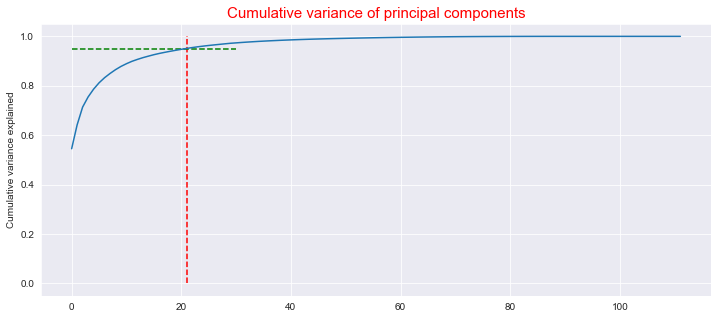

In [73]:
# Making a scree plot for the explained variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)

# Plot scree plot
fig = plt.figure(figsize=[12,5])
plt.title("Cumulative variance of principal components",color='r',size=15)
plt.vlines(x=21, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

The scree plot shows that only 21 components explains 95% of the variance. So we will build model with 21 components.

In [74]:
from sklearn.decomposition import IncrementalPCA

# Object Instastiate
pca_final = IncrementalPCA(n_components=21)

# Fitting on train data to get principle components
X_train_pca = pca_final.fit_transform(X_train)

# Fitting on test data to get principle components
X_test_pca = pca_final.transform(X_test)

# Shape of train and test data
print('Shape of train: ',X_train_pca.shape)
print('Shape of test: ',X_test_pca.shape)

Shape of train:  (14245, 21)
Shape of test:  (6105, 21)


### Random Forest Model with PCA

In [75]:
def peformance_On_testdata(model,y_test,y_test_pred):
    
    print("The Model name : {}".format(model),'\n')
    print('classification Report:\n', metrics.classification_report(y_test, y_test_pred))
    
    #roc auc Score
    print("roc_auc Score : {} ".format(metrics.roc_auc_score(y_test, y_test_pred)))
    
    #return a DataFrame with all the score
    return pd.DataFrame({"Model":[model],
                         "precision":[metrics.precision_score(y_test,y_test_pred)],
                         "recall":[metrics.recall_score(y_test,y_test_pred)],
                         "f1_score":[metrics.f1_score(y_test,y_test_pred)],
                         "roc_auc":[metrics.roc_auc_score(y_test,y_test_pred)]})   
    
    
def plot_roc_auc(model, X_test, y_test):    
    metrics.plot_roc_curve(model, X_test, y_test)
    plt.title("AUC ROC Curve", color='r', fontsize=12)
    plt.show()

In [76]:
# Creating a DataFrame for storing all test score for models and would be helpful for analysis
score_df = pd.DataFrame({"Model":[None],
                         "precision":[None],
                         "recall":[None],
                         "f1_score":[None],
                         "roc_auc":[None]})

In [77]:
#X_train, X_test for random Forest
X_train_rf = X_train_pca.copy()
X_test_rf =  X_test_pca.copy()

In [78]:
#Instantiate RandomForest, train with default parameters
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced')

#Fitting the model on train data
rf.fit(X_train_rf, y_train)

#Prediction on train
y_train_pred_rf = rf.predict(X_train_rf)

#Prediction on test
y_test_pred_rf = rf.predict(X_test_rf)

# Test Probabilities
pred_prob_rf = rf.predict_proba(X_test_rf)

In [79]:
pred_prob_rf[:10]

array([[1.  , 0.  ],
       [0.98, 0.02],
       [0.99, 0.01],
       [0.97, 0.03],
       [0.88, 0.12],
       [0.95, 0.05],
       [1.  , 0.  ],
       [0.98, 0.02],
       [0.94, 0.06],
       [1.  , 0.  ]])

In [80]:
# Getting probabilities of the Churners
pred_prob_rf = pred_prob_rf[:,1]
pred_prob_rf

array([0.  , 0.02, 0.01, ..., 0.06, 0.05, 0.24])

In [81]:
#check the default parameters
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [82]:
#Lets check the performance on test data and plot ROC AUC curve.
df1 = peformance_On_testdata('Random Forest',y_test,y_test_pred_rf)

The Model name : Random Forest 

classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      5508
           1       0.55      0.14      0.23       597

    accuracy                           0.90      6105
   macro avg       0.73      0.56      0.59      6105
weighted avg       0.88      0.90      0.88      6105

roc_auc Score : 0.5648348861226977 


In [83]:
#Add the score to dataframe for comparision with other model performance
score_df= score_df.dropna()
score_df = score_df.append(df1)
score_df

,Model,precision,recall,f1_score,roc_auc
0,Random Forest,0.548387,0.142379,0.226064,0.564835


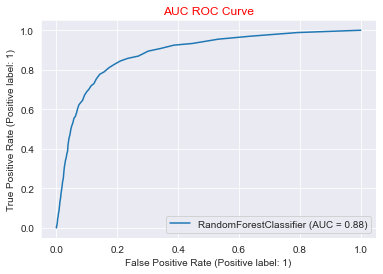

In [84]:
#plot roc auc curve
plot_roc_auc(rf,X_test_rf, y_test)

#### Hyperparamter tuning using GridsearchCv

In [85]:
from sklearn.model_selection import GridSearchCV

# Instanstiate the random forest object
rf = RandomForestClassifier(random_state=42)

# Lets define hyperparameter for tuning
params = {
    'max_depth': [2,3,5,10,15,20],
    'min_samples_leaf': [5,10,20,25,50,75,100,150,200],
    'n_estimators': [10, 25, 50, 75,100]
}

# Instanstiate gridsearchcv object
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, 
                           verbose=1, 
                           scoring="accuracy")

In [86]:
# Lets fit the model on data
grid_search.fit(X_train_rf, y_train)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 15, 20],
                         'min_samples_leaf': [5, 10, 20, 25, 50, 75, 100, 150,
                                              200],
                         'n_estimators': [10, 25, 50, 75, 100]},
             scoring='accuracy', verbose=1)

In [87]:
#Best Score   
grid_search.best_score_

0.9105651105651106

In [88]:
# Best esttimator for random forest
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=15, min_samples_leaf=5, n_estimators=25,
                       random_state=42)

In [89]:
#Prediction on train
y_train_pred_rf_tune = rf_best.predict(X_train_rf)

#Prediction on test
y_test_pred_rf_tune = rf_best.predict(X_test_rf)

# Test Probabilities
pred_prob_rf_tune = rf_best.predict_proba(X_test_rf)

In [90]:
#Lets check the performance on test data and plot ROC AUC curve.
df2 = peformance_On_testdata('Random Forest Tuned',y_test,y_test_pred_rf_tune)

The Model name : Random Forest Tuned 

classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      5508
           1       0.62      0.17      0.27       597

    accuracy                           0.91      6105
   macro avg       0.77      0.58      0.61      6105
weighted avg       0.89      0.91      0.88      6105

roc_auc Score : 0.5804549253164879 


In [91]:
#Add the score to dataframe for comparision with other model performance
score_df = score_df.append(df2)
score_df

,Model,precision,recall,f1_score,roc_auc
0,Random Forest,0.548387,0.142379,0.226064,0.564835
0,Random Forest Tuned,0.616766,0.172529,0.269634,0.580455


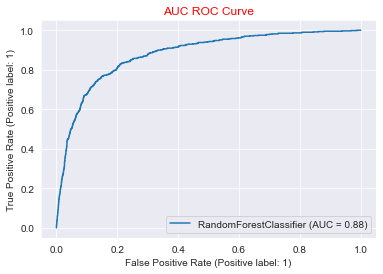

In [92]:
#plot roc auc curve
plot_roc_auc(rf_best,X_test_rf,y_test)

#### Variable importance in RandomForest

In [93]:
# Feature importance
rf_best.feature_importances_

array([0.06328449, 0.08995135, 0.05943288, 0.03305954, 0.05087724,
       0.04086708, 0.04674297, 0.04322639, 0.03860771, 0.03476232,
       0.03710061, 0.0595081 , 0.03984171, 0.02836976, 0.03454194,
       0.03261246, 0.08966493, 0.04603084, 0.05353508, 0.03285429,
       0.04512832])

In [94]:
# Lets create dataframe to check important variable
imp_df = pd.DataFrame({
    "Varname": [n for n in range(1,len(rf_best.feature_importances_)+1)],
    "Imp": rf_best.feature_importances_
})

In [95]:
#imp_df = imp_df.rename('PC_{}'.format)
#imp_df = imp_df.add_prefix('PC_')
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
1,2,0.089951
16,17,0.089665
0,1,0.063284
11,12,0.059508
2,3,0.059433
18,19,0.053535
4,5,0.050877
6,7,0.046743
17,18,0.046031
20,21,0.045128


**Herere Varname number represent Principle commponents for that number.**

### Decision Tree Model with PCA

In [96]:
#X_train, X_test for random Forest
X_train_dt = X_train_pca.copy()
X_test_dt =  X_test_pca.copy()

In [97]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42,max_depth=6)

dt.fit(X_train_dt, y_train)

y_train_pred_dt = dt.predict(X_train_dt)

y_test_pred_dt = dt.predict(X_test_dt)

In [98]:
df3 = peformance_On_testdata('Decision Tree', y_test, y_test_pred_dt)

The Model name : Decision Tree 

classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      5508
           1       0.52      0.12      0.20       597

    accuracy                           0.90      6105
   macro avg       0.72      0.56      0.57      6105
weighted avg       0.87      0.90      0.88      6105

roc_auc Score : 0.5558944869591238 


In [99]:
#Add the score to dataframe for comparision with other model performance
score_df = score_df.append(df3)
score_df

,Model,precision,recall,f1_score,roc_auc
0,Random Forest,0.548387,0.142379,0.226064,0.564835
0,Random Forest Tuned,0.616766,0.172529,0.269634,0.580455
0,Decision Tree,0.524823,0.123953,0.200542,0.555894


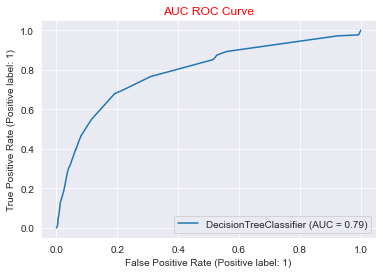

In [100]:
plot_roc_auc(dt,X_test_dt,y_test)

#### Hyper-parameter tuning for the Decision Tree

In [101]:
dt = DecisionTreeClassifier(random_state=42)

params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500],
    'min_samples_split':[3,4,5,10,15,20,50]
}

grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, 
                           verbose=1, 
                           scoring="accuracy")

In [102]:
%%time
grid_search.fit(X_train_dt, y_train)

Fitting 4 folds for each of 210 candidates, totalling 840 fits
Wall time: 51.4 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500],
                         'min_samples_split': [3, 4, 5, 10, 15, 20, 50]},
             scoring='accuracy', verbose=1)

In [103]:
grid_search.best_score_

0.9049489951421767

In [104]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=3,
                       random_state=42)

In [105]:
y_train_pred_dt_tune = dt_best.predict(X_train_dt)

y_test_pred_dt_tune = dt_best.predict(X_test_dt)

In [106]:
df4 = peformance_On_testdata('Decision Tree Tuned', y_test, y_test_pred_dt_tune)

The Model name : Decision Tree Tuned 

classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      5508
           1       0.58      0.13      0.22       597

    accuracy                           0.91      6105
   macro avg       0.75      0.56      0.58      6105
weighted avg       0.88      0.91      0.88      6105

roc_auc Score : 0.5617366060513168 


In [107]:
#Add the score to dataframe for comparision with other model performance
score_df = score_df.append(df4)
score_df

,Model,precision,recall,f1_score,roc_auc
0,Random Forest,0.548387,0.142379,0.226064,0.564835
0,Random Forest Tuned,0.616766,0.172529,0.269634,0.580455
0,Decision Tree,0.524823,0.123953,0.200542,0.555894
0,Decision Tree Tuned,0.579710,0.134003,0.217687,0.561737


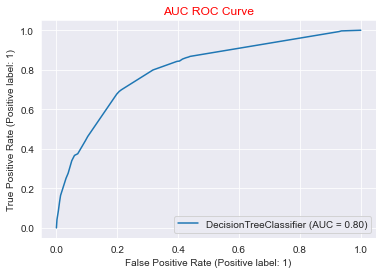

In [108]:
plot_roc_auc(dt_best,X_test_dt,y_test)

### Logistic Regression Model with PCA

In [109]:
#Copying the previous dataframes in new df for logistic regression model
X_train_lr = X_train_pca.copy()
X_test_lr = X_test_pca.copy()

In [110]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(class_weight='balanced')

lr_model.fit(X_train_lr, y_train)

y_train_pred_lr = lr_model.predict_proba(X_train_lr)


In [111]:
#y_train_pred

In [112]:
# Choosing churner probabilities
y_train_pred_lr = y_train_pred_lr[:,1]
y_train_pred_lr

array([0.86012624, 0.8855193 , 0.05102226, ..., 0.32679178, 0.17195933,
       0.01369668])

In [113]:
#Making predictions on test set 
y_test_pred_lr = lr_model.predict_proba(X_test_lr)

# Choosing only churner probabilities
y_test_pred_lr = y_test_pred_lr[:,1]
y_test_pred_lr

array([0.03169255, 0.10869014, 0.08467069, ..., 0.2086645 , 0.20733126,
       0.7247533 ])

In [124]:
y_train_pred_lr_df = pd.DataFrame(y_train.copy())

In [126]:
y_train_pred_lr_df

,target_churn
68337,1
82546,0
33095,0
33959,0
70438,0
...,...
28035,0
39272,0
87175,0
88095,0


In [128]:
y_train_pred_lr_df['Probability'] = y_train_pred_lr

In [129]:
y_train_pred_lr_df

,target_churn,Probability
68337,1,0.860126
82546,0,0.885519
33095,0,0.051022
33959,0,0.450468
70438,0,0.036354
...,...,...
28035,0,0.060399
39272,0,0.217149
87175,0,0.326792
88095,0,0.171959


In [130]:
#Finding optimal cutoffs
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_lr_df[i]= y_train_pred_lr_df.Probability.map(lambda x: 1 if x > i else 0)
y_train_pred_lr_df.head()

,target_churn,Probability,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
68337,1,0.860126,1,1,1,1,1,1,1,1,1,0
82546,0,0.885519,1,1,1,1,1,1,1,1,1,0
33095,0,0.051022,1,0,0,0,0,0,0,0,0,0
33959,0,0.450468,1,1,1,1,1,0,0,0,0,0
70438,0,0.036354,1,0,0,0,0,0,0,0,0,0


In [131]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.


cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])


# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_lr_df.target_churn, y_train_pred_lr_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.096455  1.000000  0.000000
0.1   0.1  0.413127  0.982533  0.352342
0.2   0.2  0.557599  0.959243  0.514723
0.3   0.3  0.658266  0.927948  0.629477
0.4   0.4  0.729238  0.887918  0.712299
0.5   0.5  0.791857  0.840611  0.786652
0.6   0.6  0.842050  0.783843  0.848264
0.7   0.7  0.880449  0.684134  0.901406
0.8   0.8  0.904388  0.506550  0.946857
0.9   0.9  0.907898  0.160116  0.987724


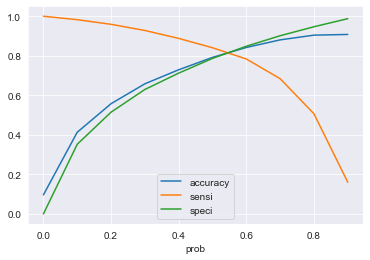

In [132]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [133]:
# Creating columns with different probability cutoffs 
num1 = [0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,
           0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
#print(numbers)
for i in num1:
    y_train_pred_lr_df[i]= y_train_pred_lr_df.Probability.map(lambda x: 1 if x > i else 0)
y_train_pred_lr_df.head()

,target_churn,Probability,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59
68337,1,0.860126,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
82546,0,0.885519,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
33095,0,0.051022,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
33959,0,0.450468,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
70438,0,0.036354,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [134]:
for i in num1:
    cm1 = metrics.confusion_matrix(y_train_pred_lr_df.target_churn, y_train_pred_lr_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.00  0.00  0.096455  1.000000  0.000000
0.10  0.10  0.413127  0.982533  0.352342
0.20  0.20  0.557599  0.959243  0.514723
0.30  0.30  0.658266  0.927948  0.629477
0.40  0.40  0.729238  0.887918  0.712299
0.50  0.50  0.791857  0.840611  0.786652
0.60  0.60  0.842050  0.783843  0.848264
0.70  0.70  0.880449  0.684134  0.901406
0.80  0.80  0.904388  0.506550  0.946857
0.90  0.90  0.907898  0.160116  0.987724
0.41  0.41  0.736188  0.884279  0.720379
0.42  0.42  0.742787  0.879913  0.728149
0.43  0.43  0.749245  0.876274  0.735685
0.44  0.44  0.757459  0.871907  0.745241
0.45  0.45  0.763005  0.864629  0.752156
0.46  0.46  0.768691  0.857351  0.759226
0.47  0.47  0.774868  0.852984  0.766529
0.48  0.48  0.779642  0.847889  0.772356
0.49  0.49  0.785679  0.844250  0.779427
0.51  0.51  0.797824  0.833333  0.794033
0.52  0.52  0.803019  0.828239  0.800326
0.53  0.53  0.808424  0.822416  0.806930
0.54  0.54  0.813689  0.817322  0.813301
0.55  0.55  0.81

In [137]:
#Taking cutoff as 0.55.
y_train_pred_lr_df['final_prediction'] = y_train_pred_lr_df[0.55]

In [139]:
y_test_pred_lr_df = pd.DataFrame(y_test_pred_lr)

In [144]:
y_test_pred_lr_df.rename(columns={0:'target_churn'},inplace=True)

In [149]:
y_test_pred_lr_df['final_prediction'] = y_test_pred_lr_df.target_churn.map(lambda x: 1 if x > 0.55 else 0) 

In [150]:
y_test_pred_lr_df

,target_churn,final_prediction
0,0.031693,0
1,0.108690,0
2,0.084671,0
3,0.166922,0
4,0.594187,1
...,...,...
6100,0.126426,0
6101,0.200928,0
6102,0.208665,0
6103,0.207331,0


In [151]:
df5 = peformance_On_testdata('Logistic Regression', y_test, y_test_pred_lr_df.final_prediction)

The Model name : Logistic Regression 

classification Report:
               precision    recall  f1-score   support

           0       0.98      0.82      0.89      5508
           1       0.33      0.81      0.47       597

    accuracy                           0.82      6105
   macro avg       0.65      0.81      0.68      6105
weighted avg       0.91      0.82      0.85      6105

roc_auc Score : 0.8135434799268675 


In [152]:
#Add the score to dataframe for comparision with other model performance
score_df = score_df.append(df5)
score_df

,Model,precision,recall,f1_score,roc_auc
0,Random Forest,0.548387,0.142379,0.226064,0.564835
0,Random Forest Tuned,0.616766,0.172529,0.269634,0.580455
0,Decision Tree,0.524823,0.123953,0.200542,0.555894
0,Decision Tree Tuned,0.579710,0.134003,0.217687,0.561737
0,Logistic Regression,0.326780,0.807370,0.465251,0.813543


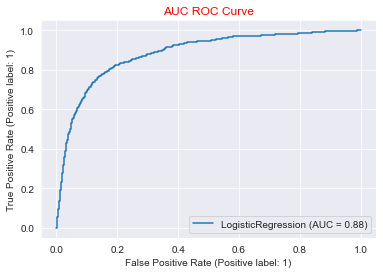

In [153]:
#Roc curve on test data
plot_roc_auc(lr_model, X_test_lr, y_test)

# Please start with without PCA model.